In [ ]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [ ]:
import scipy.io


# Load the .mat file
#mat_data = scipy.io.loadmat("C:/Users/16472/Downloads/umist_cropped.mat")
mat_data = scipy.io.loadmat("/content/umist_cropped.mat")
# Access the variables in the loaded data
# For example, if your MATLAB file contains a variable 'my_variable', you can access it like this:
print(f'mat_data type: {type(mat_data)}, mat_data.keys(): {mat_data.keys()}')
print(f'\nfacedat type: {type(mat_data["facedat"])}, facedat shape: {mat_data["facedat"].shape}')
print(f'dirnames type: {type(mat_data["dirnames"])}, dirnames shape: {mat_data["dirnames"].shape}')
face_data = mat_data['facedat'][0]


mat_data type: <class 'dict'>, mat_data.keys(): dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])

facedat type: <class 'numpy.ndarray'>, facedat shape: (1, 20)
dirnames type: <class 'numpy.ndarray'>, dirnames shape: (1, 20)


In [ ]:
print(f'\nNumber of people in images [len(face_data)]: {len(face_data)}\nImage height [len(face_data[0]]: {len(face_data[0])}\nImage width [len(face_data[0][0]]: {len(face_data[0][0])}\nImage total pixels [height X width]: {len(face_data[0]) * len(face_data[0][0])}')


Number of people in images [len(face_data)]: 20
Image height [len(face_data[0]]: 112
Image width [len(face_data[0][0]]: 92
Image total pixels [height X width]: 10304


# New section

In [ ]:
data, label = [], []
for idx, person in enumerate(face_data):
  for i in range(person.shape[2]):
    img = person[:,:,i]
    img = img.reshape(10304)
    data.append(img)
    label.append(idx)

data, label = np.array(data), np.array(label)   # LABEL: Range of label values: 0-19. When using the for-loop and print(f'Label: {label}'), each picture is tagged with the correct label per-person
print(f'data shape: {data.shape}, label shape: {label.shape}, unique people ids: {np.unique(label)}')


data shape: (575, 10304), label shape: (575,), unique people ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
data.shape

(575, 10304)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label)

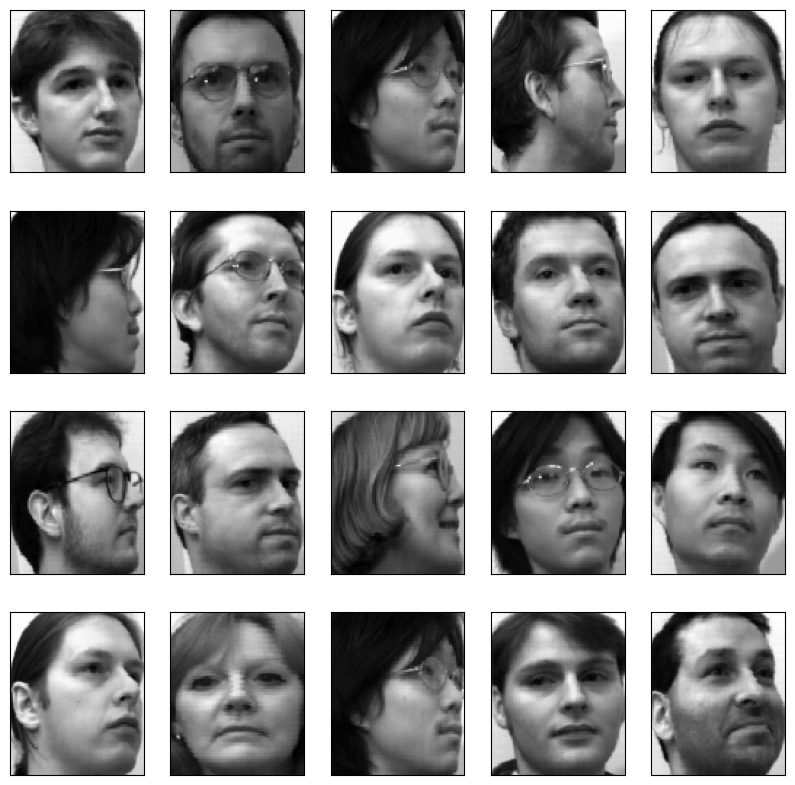

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
for i in range(0,20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(x_test[i].reshape(112,92), cmap='gray')
    plt.xticks([])
    plt.yticks([])



In [ ]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


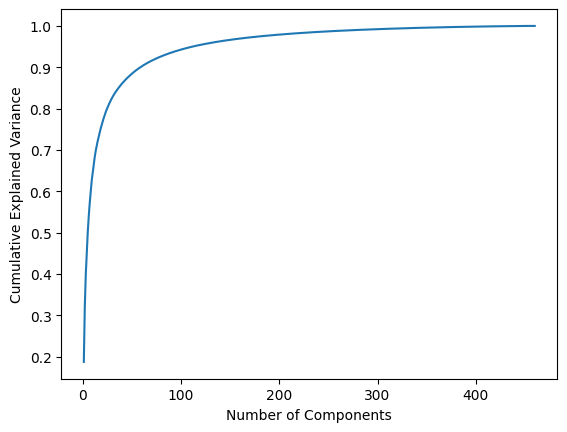

In [ ]:

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

import matplotlib.pyplot as plt

# Plotting cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
n_components_99

277

In [ ]:

pca_final = PCA(n_components=270)
x_train_pca = pca_final.fit_transform(x_train)
print(f'Explained variance: {sum(pca.explained_variance_ratio_)}')
x_test_pca = pca.transform(x_test)


Explained variance: 1.000000000000001


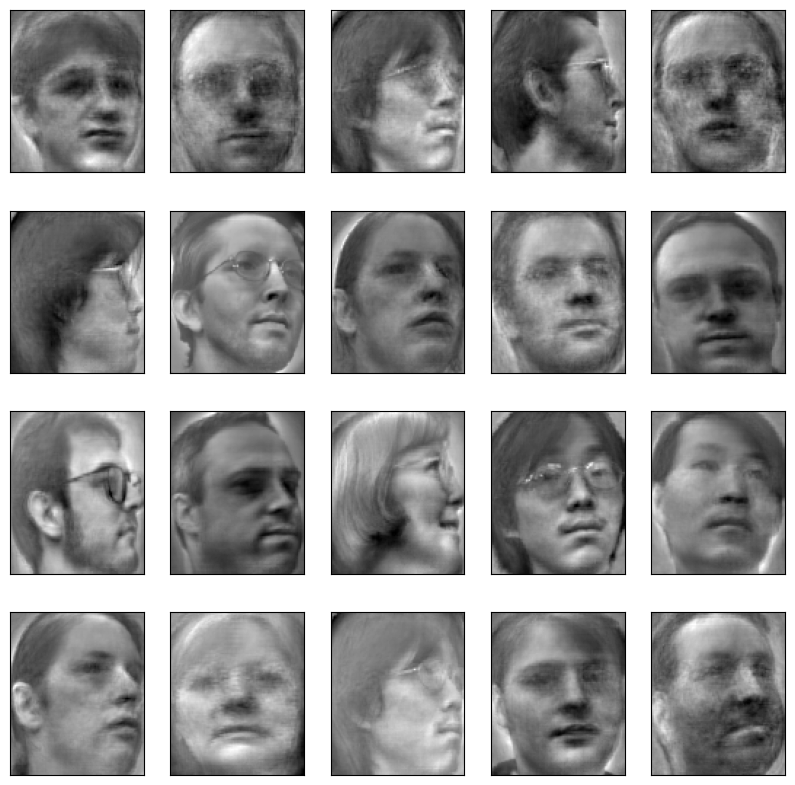

In [ ]:
inverse = pca.inverse_transform(x_test_pca)   # Face images in the stratified training set, 0 to 344
fig = plt.figure(figsize=(10, 10))
for i in range(0,20):
    fig.add_subplot(4,5,i+1)

    plt.imshow(np.array(inverse[i]).reshape(112,92), cmap='gray')
    plt.xticks([])
    plt.yticks([])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

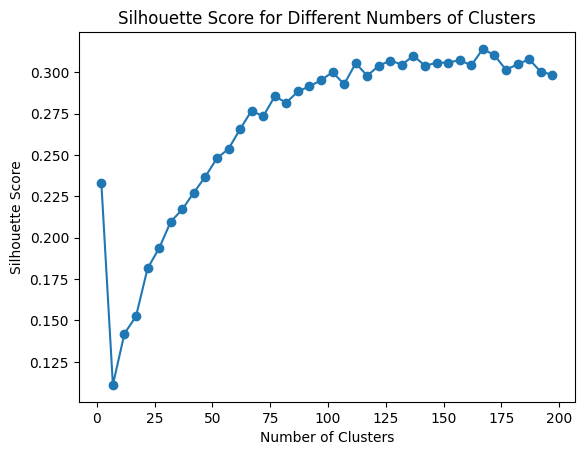

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

silhouette_scores = []
kmeans_models = []
cluster_range = range(2, 200,5)
# Iterate over different cluster numbers
for n_clusters in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x_train_pca)

    # Predict cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_train_pca, labels)
    silhouette_scores.append(silhouette_avg)

    # Store the KMeans model
    kmeans_models.append(kmeans)

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


In [ ]:



x_train_images = x_train.reshape(-1,112,92,1)

In [ ]:
x_train_images.shape

(460, 112, 92, 1)

In [ ]:
x_train_pca.shape


(460, 273)

In [ ]:

!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-Applications -y
!pip install tensorflow
!pip install keras-tuner
#import tensorflow as tf

Found existing installation: keras 2.14.0
Uninstalling keras-2.14.0:
  Successfully uninstalled keras-2.14.0
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)


**I've tried using the keras tuner**

In [ ]:
#HyperParamter tuning

import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter

mat_data = sio.loadmat("/content/umist_cropped.mat")

face_data = mat_data['facedat'][0]
data, label = [], []
for idx, person in enumerate(face_data):
    for i in range(person.shape[2]):
        img = person[:, :, i]
        img = img.reshape(-1)
        data.append(img)
        label.append(idx)


data, label = np.array(data), np.array(label)
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


num_components = min(x_train.shape[1], x_train.shape[0] - 1)
pca_final = PCA(n_components=273)
x_train_pca = pca_final.fit_transform(x_train)
x_test_pca = pca_final.transform(x_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=129)
x_train_kmeans = kmean.fit_transform(x_train_pca)
x_test_kmeans = kmean.transform(x_test_pca)




def build_model(hp):
    model = keras.Sequential()


    model.add(tf.keras.layers.Reshape((x_train_kmeans.shape[1],), input_shape=(x_train_kmeans.shape[1],)))

    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(tf.keras.layers.Dense(units=hp.Int(f'dense_units_{i}', min_value=64, max_value=512, step=64),
                                       activation=hp.Choice(f'activation_{i}', values=['relu', 'sigmoid'])))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(tf.keras.layers.Dense(20, activation="softmax"))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increase the number of trials for a more comprehensive search also reduce for quicker training
    directory='hyperparamter tuning',
    project_name='facial_recognition'
)


tuner.search(x_train_kmeans, y_train, batch_size=86, epochs=100, validation_data=(x_train_kmeans, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


final_model = tuner.hypermodel.build(best_hps)


final_model.fit(x_train_kmeans, y_train, epochs=100, batch_size=86, validation_data=(x_test_kmeans, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reloading Tuner from hyperparamter tuning/facial_recognition/tuner0.json
Epoch 1/100
6/6 [==============================] - 3s 96ms/step - loss: 2.3016 - accuracy: 0.3717 - val_loss: 5.0199 - val_accuracy: 0.0696
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.8917 - accuracy: 0.7022 - val_loss: 6.1212 - val_accuracy: 0.0696
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5913 - accuracy: 0.8239 - val_loss: 6.1535 - val_accuracy: 0.0696
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 0.4172 - accuracy: 0.8435 - val_loss: 5.3192 - val_accuracy: 0.0696
Epoch 5/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3795 - accuracy: 0.8761 - val_loss: 5.4172 - val_accuracy: 0.1130
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.3026 - accuracy: 0.9022 - val_loss: 5.2935 - val_accuracy: 0.1130
Epoch 7/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2344 - accura

In [ ]:
final_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 129)               0         
                                                                 
 dense_23 (Dense)            (None, 384)               49920     
                                                                 
 batch_normalization_14 (Ba  (None, 384)               1536      
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 384)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               49280     
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                    

In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test_kmeans, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions on the test set
y_pred = final_model.predict(x_test_kmeans)

# Convert one-hot encoded labels back to categorical labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate recall for each class
recall_per_class = []
for i in range(20):
    true_positive = np.sum((y_true_labels == i) & (y_pred_labels == i))
    actual_positive = np.sum(y_true_labels == i)
    recall = true_positive / actual_positive if actual_positive > 0 else 0
    recall_per_class.append(recall)

# Print recall for each class
for i, recall in enumerate(recall_per_class):
    print(f"Class {i + 1} Recall: {recall:.4f}")

# Calculate and print confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true_labels, y_pred_labels, num_classes=20)
#print("\nConfusion Matrix:")
#print(confusion_matrix.numpy())

4/4 [==============================] - 0s 19ms/step - loss: 18.3439 - accuracy: 0.1826

Test Accuracy: 0.1826
4/4 [==============================] - 2s 16ms/step
Class 1 Recall: 0.0000
Class 2 Recall: 0.0000
Class 3 Recall: 0.0000
Class 4 Recall: 0.0000
Class 5 Recall: 0.0000
Class 6 Recall: 1.0000
Class 7 Recall: 0.0000
Class 8 Recall: 1.0000
Class 9 Recall: 0.0000
Class 10 Recall: 0.0000
Class 11 Recall: 0.0000
Class 12 Recall: 0.0000
Class 13 Recall: 1.0000
Class 14 Recall: 0.0000
Class 15 Recall: 0.0000
Class 16 Recall: 0.0000
Class 17 Recall: 0.0000
Class 18 Recall: 1.0000
Class 19 Recall: 0.0000
Class 20 Recall: 0.0000


<Axes: >

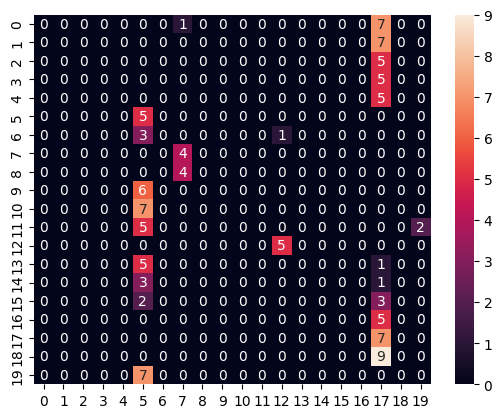

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix.numpy(), annot=True)